In [1]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 1 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 17.52 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (1048/1048), done.


In [2]:
## unzip archives  q - quite, n - don't overwrite
!unzip -q -n '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip -q -n '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

In [3]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)
print("Covid Positive cases: ", count)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)

print("Covid Negative cases: ", count)

Covid Positive cases:  348
Covid Negative cases:  396


In [14]:
covid_dataset_dir = '/content/CT_COVID'
noncovid_dataset_dir = '/content/CT_NonCOVID'
base_dir = '/content/COVID_Detection'
os.mkdir(base_dir)

FileExistsError: ignored

In [11]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
os.mkdir(validation_noncovid_dir)

FileExistsError: ignored

In [15]:
import shutil
fnames = ['covid-{}.png'.format(i) for i in range(280)]
for fname in fnames:
    src = os.path.join(covid_dataset_dir, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid-{}.png'.format(i) for i in range(281,348)]
for fname in fnames:
    src = os.path.join(covid_dataset_dir, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

    
fnames = ['noncovid-{}.png'.format(i) for i in range(316)]
for fname in fnames:
    src = os.path.join(noncovid_dataset_dir, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(317, 396)]
for fname in fnames:
    src = os.path.join(noncovid_dataset_dir, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)


In [47]:
print('total training covid images:', len(os.listdir(train_covid_dir)))
print('total training noncovid images:', len(os.listdir(train_noncovid_dir)))

print('total validation covid images:', len(os.listdir(validation_covid_dir)))
print('total validation noncovid images:', len(os.listdir(validation_noncovid_dir)))

total training covid images: 280
total training noncovid images: 316
total validation covid images: 67
total validation noncovid images: 79


In [18]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [19]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [59]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

Found 596 images belonging to 2 classes.
Found 146 images belonging to 2 classes.


In [60]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


10/10 [==============================] - 2s 147ms/step - loss: 0.6452 - acc: 0.6350 - val_loss: 0.6208 - val_acc: 0.6500
Epoch 2/30
10/10 [==============================] - 1s 144ms/step - loss: 0.6811 - acc: 0.5700 - val_loss: 0.6332 - val_acc: 0.6500
Epoch 3/30
10/10 [==============================] - 1s 150ms/step - loss: 0.6781 - acc: 0.5650 - val_loss: 0.6388 - val_acc: 0.6200
Epoch 4/30
10/10 [==============================] - 1s 136ms/step - loss: 0.6349 - acc: 0.6050 - val_loss: 0.6367 - val_acc: 0.6000
Epoch 5/30
10/10 [==============================] - 1s 148ms/step - loss: 0.6365 - acc: 0.6500 - val_loss: 0.6377 - val_acc: 0.6400
Epoch 6/30
10/10 [==============================] - 1s 144ms/step - loss: 0.6401 - acc: 0.6480 - val_loss: 0.6143 - val_acc: 0.6900
Epoch 7/30
10/10 [==============================] - 2s 166ms/step - loss: 0.6097 - acc: 0.6750 - val_loss: 0.6324 - val_acc: 0.6200
Epoch 8/30
10/10 [==============================] - 1s 152ms/step - loss: 0.6293 - acc:

30
30


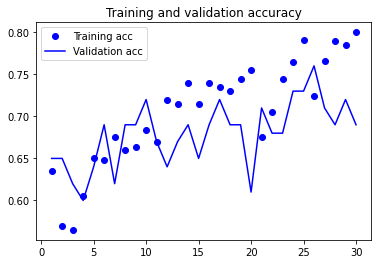

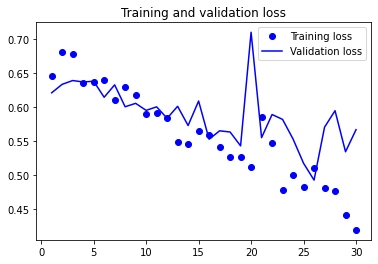

In [62]:
model.save('covid.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(len(acc))
print(len(val_acc))

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [55]:
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Exercise
We have downlaoded the COVID Image Data for you. Now, please a train and build a classification model to detect COVID vs Non-Covid cases. 

In [58]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Found 596 images belonging to 2 classes.
Found 146 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


10/10 [==============================] - 2s 243ms/step - loss: 0.6606 - acc: 0.6000 - val_loss: 0.6514 - val_acc: 0.6100
Epoch 2/30
10/10 [==============================] - 2s 252ms/step - loss: 0.6570 - acc: 0.5650 - val_loss: 0.6580 - val_acc: 0.5000
Epoch 3/30
10/10 [==============================] - 2s 227ms/step - loss: 0.6315 - acc: 0.6300 - val_loss: 0.6264 - val_acc: 0.6200
Epoch 4/30
10/10 [==============================] - 2s 225ms/step - loss: 0.6313 - acc: 0.6600 - val_loss: 0.6834 - val_acc: 0.4900
Epoch 5/30
10/10 [==============================] - 2s 231ms/step - loss: 0.6406 - acc: 0.6200 - val_loss: 0.6500 - val_acc: 0.5700
Epoch 6/30
10/10 [==============================] - 2s 238ms/step - loss: 0.6660 - acc: 0.5850 - val_loss: 0.6653 - val_acc: 0.5400
Epoch 7/30
10/10 [==============================] - 2s 237ms/step - loss: 0.6508 - acc: 0.6100 - val_loss: 0.6382 - val_acc: 0.5700
Epoch 8/30
10/10 [==============================] - 3s 280ms/step - loss: 0.6325 - acc:

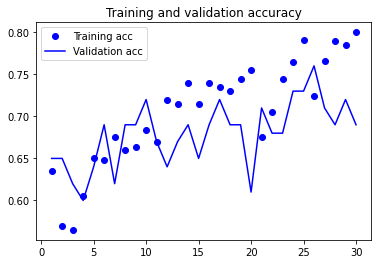

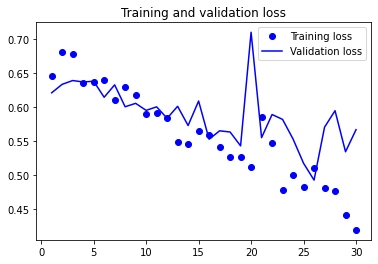

In [61]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()